<a href="https://colab.research.google.com/github/IbrahimTGhanem/ML_datathons/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Content:**
A-Importing Libraries and dataset;
B-Initial inspection of variables; C-Exploratory data analysis (EDA); D-Application fo K-nearst neighbor approach.

**A-Importing Libraries and dataset:**

In [1]:
#Importing Libraries # 1
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

# Specify the path to the file on your local machine
uploaded = files.upload()

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


In [3]:
df = pd.read_csv('CHL5230-F23-Datathon#1-Dataset2.csv')

In [4]:
df.head

<bound method NDFrame.head of       Age  Gender  Air Pollution  Alcohol Usage  Genetic Risk  Lung Disease  \
0      33       1              2              4             3             2   
1      17       1              3              1             4             2   
2      35       1              4              5             5             4   
3      37       1              7              7             6             7   
4      46       1              6              8             7             6   
...   ...     ...            ...            ...           ...           ...   
1460   24       1              6              1             3             1   
1461   53       1              6              2             2             1   
1462   62       1              6              8             1             1   
1463   29       1              6              1             2             3   
1464   55       1              6              2             3             2   

      Obesity  Smokin

**B-Intial Inspection of the likelihood of different severity levels for each compositional factor**

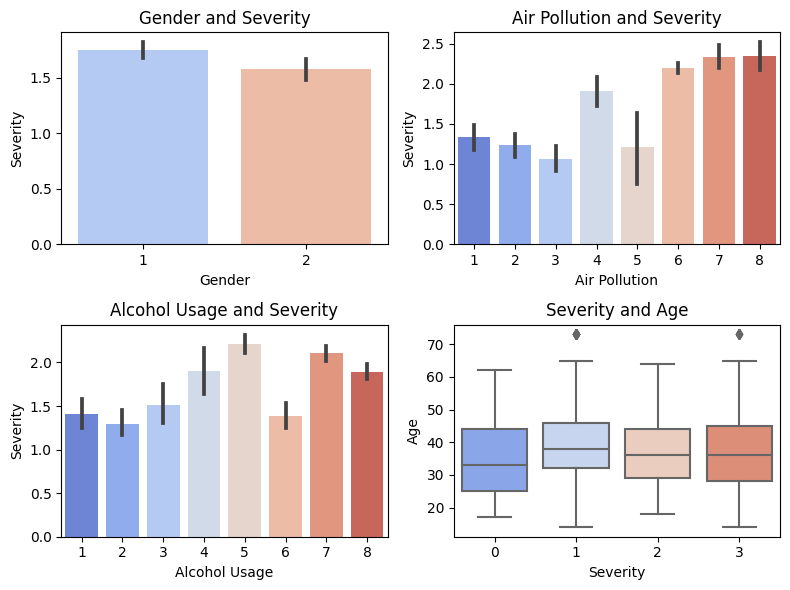

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

#Gender and Severity
sns.barplot(data=df, x="Gender", y="Severity", palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Gender and Severity")

#Air Pollution and Severity
sns.barplot(data=df, x="Air Pollution", y="Severity", palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("Air Pollution and Severity")

#Alcohol Usage and Severity
sns.barplot(data=df, x="Alcohol Usage", y="Severity", palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Alcohol Usage and Severity")

#Severity and Age
sns.boxplot(data=df, x="Severity", y="Age", palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Severity and Age")

#plot layout
plt.tight_layout()

#visualize plots
plt.show()


In [6]:
#adding additional coloumn to represent lung cancer on binary classification:
df['Lung cancer'] = df ['Severity'].apply(lambda x: 1 if x in [0,1,2] else 0)

**C-Exploratory Data Analysis**

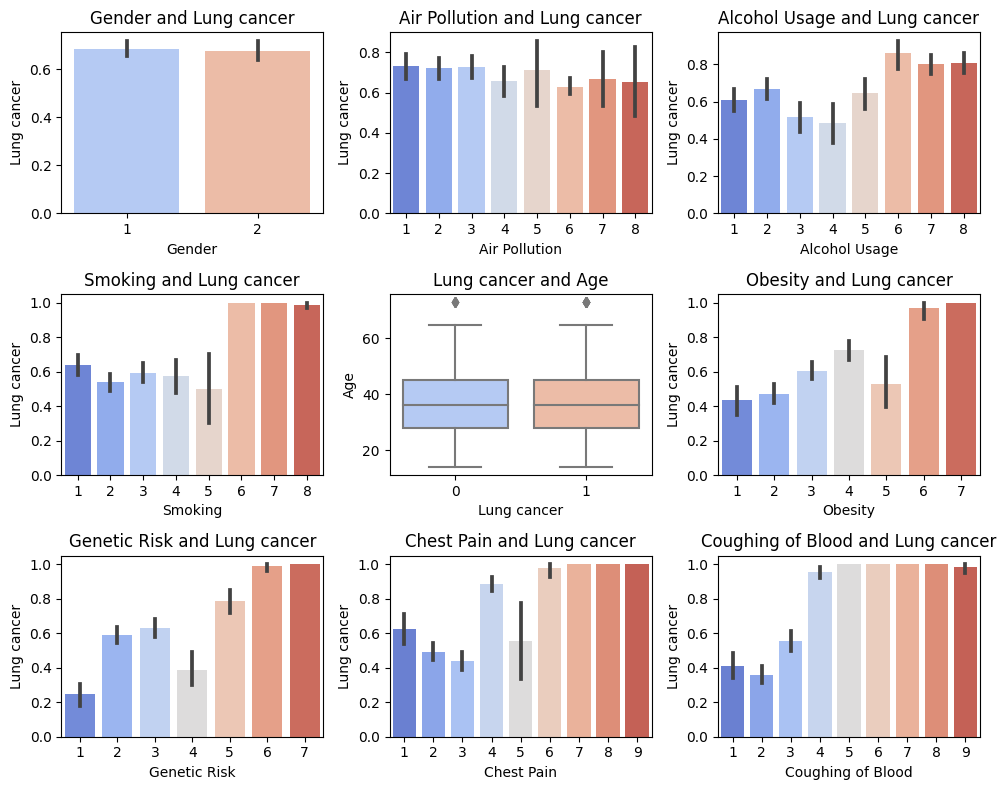

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

#Gender and Lung cancer
sns.barplot(data=df, x="Gender", y="Lung cancer", palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Gender and Lung cancer")

#Air Pollution and Lung cancer
sns.barplot(data=df, x="Air Pollution", y="Lung cancer", palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("Air Pollution and Lung cancer")

#Alcohol Usage and Lung cancer
sns.barplot(data=df, x="Alcohol Usage", y="Lung cancer", palette='coolwarm', ax=axes[0, 2])
axes[0, 2].set_title("Alcohol Usage and Lung cancer")

#Smoking and Lung cancer
sns.barplot(data=df, x="Smoking", y="Lung cancer", palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Smoking and Lung cancer")

#Lung cancer and Age
sns.boxplot(data=df, x="Lung cancer", y="Age", palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Lung cancer and Age")

#Obesity and Lung cancer
sns.barplot(data=df, x="Obesity", y="Lung cancer", palette='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title("Obesity and Lung cancer")

#Genetic Risk and Lung cancer
sns.barplot(data=df, x="Genetic Risk", y="Lung cancer", palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title("Genetic Risk and Lung cancer")

#Chest Pain and Lung cancer
sns.barplot(data=df, x="Chest Pain", y="Lung cancer", palette='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title("Chest Pain and Lung cancer")

#Coughing of Blood and Lung cancer
sns.barplot(data=df, x="Coughing of Blood", y="Lung cancer", palette='coolwarm', ax=axes[2, 2])
axes[2, 2].set_title("Coughing of Blood and Lung cancer")

#plot layout
plt.tight_layout()

#visualize plots
plt.show()


**D-Application of the KNN classificattion method**

In [7]:
#Importing Libraries # 2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

In [8]:
#creating a grid and cross-validation scores
k_grid = [num for num in range (1,31)]
cv_score = []

In [9]:
#defining X (independent variables/features) Y(the target variable to be predicted)
X = df[["Genetic Risk","Smoking", "Air Pollution", "Alcohol Usage", "Obesity"]]
y = df["Lung cancer"]

In [10]:
#performing cross-validation to assess a model's performance by splitting the dataset into a traning set (80%) and test set (20%)
#This process is repeated five times, with each of the five fold serving as a stest set once while the other 4 folds are serving as a training set.
for k in k_grid:
  knn  = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y,cv=5)
  cv_score.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

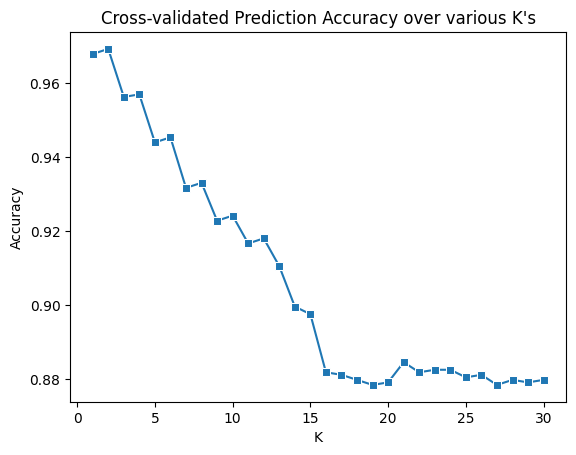

In [11]:
#visualizing the relationship between K and the corresponding cross-validation (accuracy) scores
sns.lineplot(x=k_grid, y=cv_score, marker = "s").set(title = "Cross-validated Prediction Accuracy over various K's")
plt.xlabel("K")
plt.ylabel("Accuracy")


In [12]:
#displaying accuracy scores in a table format
data = {'K': k_grid, 'Accuracy': cv_score}
df = pd.DataFrame(data)
print(df)

     K  Accuracy
0    1  0.967918
1    2  0.969283
2    3  0.956314
3    4  0.956997
4    5  0.944027
5    6  0.945392
6    7  0.931741
7    8  0.933106
8    9  0.922867
9   10  0.924232
10  11  0.916724
11  12  0.918089
12  13  0.910580
13  14  0.899659
14  15  0.897611
15  16  0.881911
16  17  0.881229
17  18  0.879863
18  19  0.878498
19  20  0.879181
20  21  0.884642
21  22  0.881911
22  23  0.882594
23  24  0.882594
24  25  0.880546
25  26  0.881229
26  27  0.878498
27  28  0.879863
28  29  0.879181
29  30  0.879863
